In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from scipy.special import boxcox, inv_boxcox
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# load data 

houseData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bengaluru_House_Data.csv')

In [ ]:
# check columns and data in houseData
print(houseData.columns)



Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [ ]:
houseData.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
print(houseData.apply(lambda col: col.unique()))


area_type       [Super built-up  Area, Plot  Area, Built-up  A...
availability    [19-Dec, Ready To Move, 18-May, 18-Feb, 18-Nov...
location        [Electronic City Phase II, Chikka Tirupathi, U...
size            [2 BHK, 4 Bedroom, 3 BHK, 4 BHK, 6 Bedroom, 3 ...
society         [Coomee , Theanmp, nan, Soiewre, DuenaTa, Jaad...
total_sqft      [1056, 2600, 1440, 1521, 1200, 1170, 2732, 330...
bath            [2.0, 5.0, 3.0, 4.0, 6.0, 1.0, 9.0, nan, 8.0, ...
balcony                                 [1.0, 3.0, nan, 2.0, 0.0]
price           [39.07, 120.0, 62.0, 95.0, 51.0, 38.0, 204.0, ...
dtype: object


In [ ]:
houseData.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
houseData=houseData.dropna()

In [ ]:
houseData.isna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13313,False,False,False,False,False,False,False,False,False
13314,False,False,False,False,False,False,False,False,False
13315,False,False,False,False,False,False,False,False,False
13317,False,False,False,False,False,False,False,False,False


In [ ]:
houseData.shape

(7496, 9)

In [ ]:
houseData = houseData.drop_duplicates()

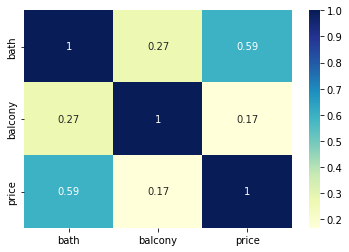

In [ ]:
# plotting correlation heatmap
# Assumption 3: Data features should not have multicolilinearlity 
dataplot = sns.heatmap(houseData.corr(), cmap="YlGnBu", annot=True)

In [ ]:
houseData.shape

(7144, 9)

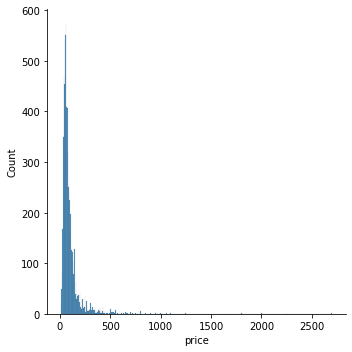

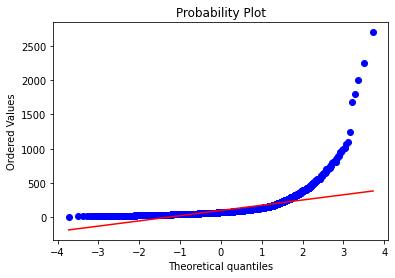

In [ ]:
sns.displot(houseData['price'])
plt.show()
stats.probplot(houseData['price'],dist="norm", plot=plt)
plt.show()

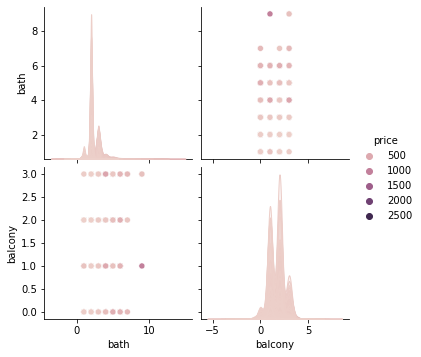

In [ ]:
sns.pairplot(houseData,hue ='price')

In [ ]:
skew(houseData.price),kurtosis(houseData.price)

(7.623934694112824, 113.5031549617916)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


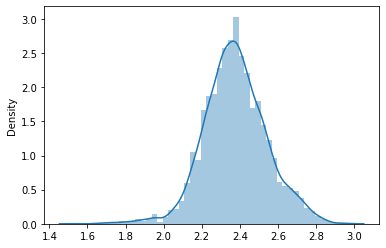

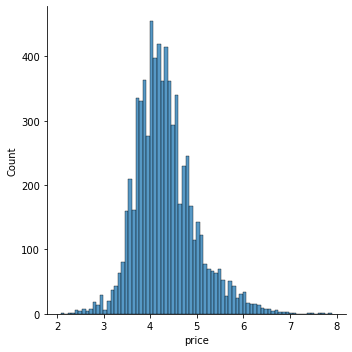

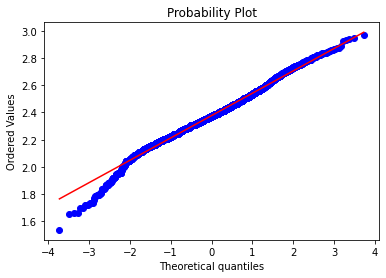

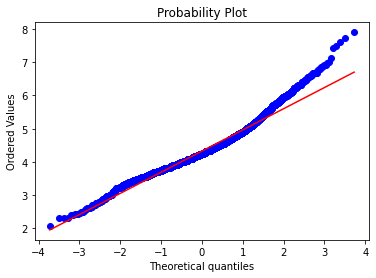

In [ ]:

#transform the data using box-cox
price_Transformed, priceLambda = stats.boxcox(houseData['price']);
price_logTransform = np.log(houseData['price']);

#plot the distribution curve and QQ-plot for transformed data
sns.distplot(price_Transformed);
plt.show()
sns.displot(price_logTransform);
plt.show()

stats.probplot(price_Transformed,dist="norm", plot=plt)
plt.show()
stats.probplot(price_logTransform,dist="norm", plot=plt)
plt.show()

In [ ]:
print(skew(price_Transformed),kurtosis(price_Transformed))

-0.04468320368298896 0.8755716800002311


From info of data set we understood these are numeric independent variables, lets see the distribution of the variables



*   Bath
*   Balcony


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


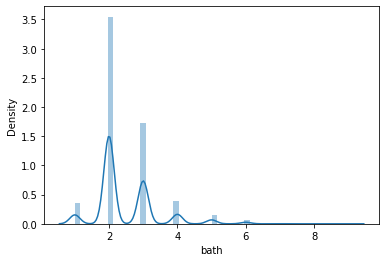

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


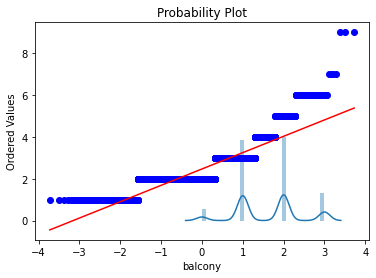

((array([-3.72665112, -3.4967287 , -3.37027153, ...,  3.37027153,
          3.4967287 ,  3.72665112]), array([0., 0., 0., ..., 3., 3., 3.])),
 (0.7281190743230794, 1.6269596864501679, 0.9253546714285209))

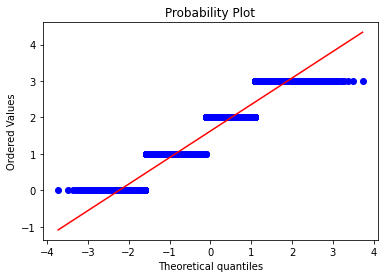

In [ ]:
sns.distplot(houseData['bath'])
plt.show()
stats.probplot(houseData['bath'],dist="norm",plot=plt)

sns.distplot(houseData['balcony'])
plt.show()
stats.probplot(houseData['balcony'],dist="norm",plot=plt)


In [ ]:
print(skew(houseData.bath),kurtosis(houseData.bath))
print(skew(houseData.balcony),kurtosis(houseData.balcony))

1.5056196922316034 3.8904520481499247
0.07052153572739175 -0.5257053871493138


In [ ]:
# print(houseData['bath'].unique())
# bath_transformed ,lambd= stats.boxcox(houseData['bath']);
# sns.displot(bath_transformed)
# plt.show()
# stats.probplot(bath_transformed,dist="norm",plot=plt)
# plt.show()
# print(bath_transformed)


# this was done before checking skewness.
# the kurtosis and skewness gives us idea that applying boxcox is not needed

In [ ]:
df1=houseData.drop(['area_type', 'availability','society'], axis = 1)

In [ ]:
df1['price_Transformed'] =  price_Transformed

In [ ]:
df1['BHK'] = df1['size'].apply(lambda x: x.split(' ')[0])

In [ ]:
df1['location'] = df1['location'].apply(lambda x: x.strip())

In [ ]:
df1.head(10)

,location,size,total_sqft,bath,balcony,price,price_Transformed,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.199278,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2.507050,4
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,2.451415,3
5,Whitefield,2 BHK,1170,2.0,1.0,38.00,2.190235,2
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00,2.687572,4
12,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.00,2.190235,2
14,Sarjapur,3 Bedroom,2250,3.0,2.0,148.00,2.553704,3
15,Mysore Road,2 BHK,1175,2.0,2.0,73.50,2.385526,2
16,Bisuvanahalli,3 BHK,1180,3.0,2.0,48.00,2.263960,3
17,Raja Rajeshwari Nagar,3 BHK,1540,3.0,3.0,60.00,2.329607,3


In [ ]:
df1.to_csv("data_Location_Column.csv")


In [ ]:
print(df1['total_sqft'].unique())

['1056' '2600' '1521' ... '1919' '2111' '4689']


In [ ]:
def conv(x):
    arr = x.split('-')
    if len(arr) == 2:
        avg = (float(arr[0]) + float(arr[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None

In [ ]:
df1['total_sqft'] = df1['total_sqft'].apply(lambda x: conv(x))

((array([-3.72665112, -3.4967287 , -3.37027153, ...,  3.37027153,
          3.4967287 ,  3.72665112]),
  array([ 11.,  60., 284., ...,  nan,  nan,  nan])),
 (nan, nan, nan))

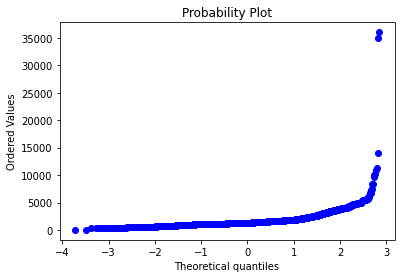

In [ ]:
stats.probplot(df1['total_sqft'],dist ="norm",plot=plt)

In [ ]:
df1['total_sqft'].dropna()

0        1056.0
1        2600.0
3        1521.0
5        1170.0
11       2785.0
          ...  
13308    1527.0
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
Name: total_sqft, Length: 7129, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


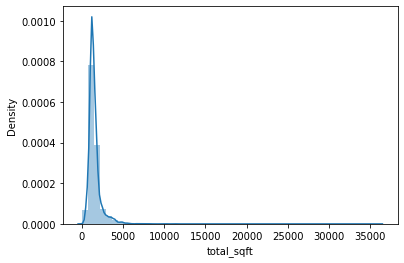

In [ ]:
sns.distplot(df1['total_sqft'])
plt.show()


In [ ]:
df1.reset_index(drop=True)

,location,size,total_sqft,bath,balcony,price,price_Transformed,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.199278,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2.507050,4
2,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,2.451415,3
3,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2.190235,2
4,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,2.687572,4
...,...,...,...,...,...,...,...,...
7139,Bannerghatta Road,3 BHK,1527.0,3.0,1.0,142.00,2.544734,3
7140,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,2.491033,3
7141,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,2.643319,5
7142,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2.329607,2


In [ ]:
df1.dropna(inplace=True)
df1.total_sqft.isna()
print(df1.total_sqft.sum())
# if df1.total_sqft.any() == 'NaN':
#   print("yes")
print(skew(df1.total_sqft),kurtosis(df1.total_sqft))

10797394.685
14.771945479976775 467.9001750763591


((array([-3.7261211 , -3.49616794, -3.36969237, ...,  3.36969237,
          3.49616794,  3.7261211 ]),
  array([1.10e+01, 6.00e+01, 2.84e+02, ..., 1.40e+04, 3.50e+04, 3.60e+04])),
 (674.2014495647289, 1514.5735285453782, 0.7080829966070592))

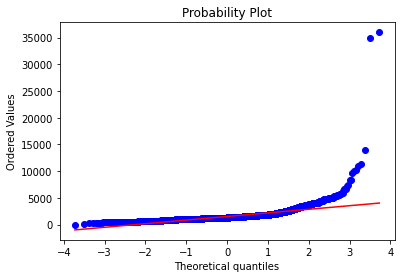

In [ ]:
stats.probplot(df1['total_sqft'],dist ="norm",plot=plt)

In [ ]:
# total_sqft_norm,lambd = stats.boxcox(df1['total_sqft'])
# stats.probplot(total_sqft_norm,dist ="norm",plot=plt)
# #  there are outliers 

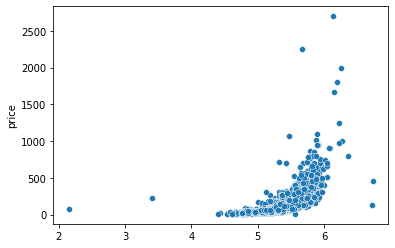

In [ ]:
sns.scatterplot(x=total_sqft_norm,y=df1['price'])

In [ ]:
# df1['total_sqft_norm']= total_sqft_norm
df1['total_sqft_norm']= df1.total_sqft

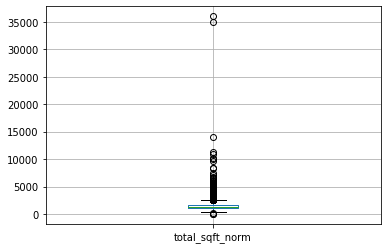

In [ ]:
# Remove outliers using boxplot
df1.boxplot(column=['total_sqft_norm'])


In [ ]:
df1.drop(['total_sqft','price','size'],axis= 1,inplace=True);
df1.reset_index()
df1.dropna(inplace=True)
df1.shape
df1.columns


Index(['location', 'bath', 'balcony', 'price_Transformed', 'BHK',
       'total_sqft_norm'],
      dtype='object')

In [ ]:
location_count=df1.location.value_counts()
location_count

Whitefield            382
Sarjapur  Road        297
Electronic City       231
Thanisandra           209
Kanakpura Road        195
                     ... 
Hosapalya               1
St. John's Road         1
Vikram Nagar            1
Alfa Garden Layout      1
Narayanappa Garden      1
Name: location, Length: 625, dtype: int64

In [ ]:
# location count less than 10  mark as other
location_count_10 = location_count[location_count < 10]
df1.location = df1.location.apply(lambda x:'other' if x in location_count_10 else x)


In [ ]:
df1.location.value_counts()
len(df1.location)

7129

In [ ]:
# one hot encoding for categorial features
dummies = pd.get_dummies(df1.location);

In [ ]:
dummies.columns
# df1.drop(['location'],axis=1,inplace=True)
Final_data = pd.concat([df1,dummies],axis=1)

In [ ]:
Final_data.drop(['location'],axis=1,inplace=True)


In [ ]:
Final_data.fillna("NaN",inplace=True);

In [ ]:
# split data using train_test_split
Final_data.dropna(inplace=True)
X = Final_data.drop(['price_Transformed'],axis=1);
Y = Final_data['price_Transformed']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=23,test_size=0.33)
print(X_train.shape);
print(X_test.shape);
print(Y_train.shape);
print(Y_test.shape);


(4776, 155)
(2353, 155)
(4776,)
(2353,)


In [ ]:
# # identify outliers in the training dataset
# # Refered from:https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# lof = LocalOutlierFactor()
# yhat = lof.fit_predict(X_train)
# # select all rows that are not outliers
# mask = yhat != -1
# # print()
# X_train, Y_train = X_train.iloc[mask, :].values, Y_train.iloc[mask].values
# # summarize the shape of the updated training dataset
# print(X_train.shape, Y_train.shape)

In [ ]:
linerReg = LinearRegression();
linerReg.fit(X_train.values,Y_train);
y_Pred = linerReg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
y_Pred

array([2.32516038, 2.54045038, 2.66028026, ..., 2.5183434 , 2.522308  ,
       2.91906409])

In [ ]:
# Reference:https://stackoverflow.com/questions/26391454/reverse-box-cox-transformation
Y_Pred_Transform = inv_boxcox(y_Pred, priceLambda)
Y_Pred_Transform

array([  59.07078851,  139.24655507,  253.1532817 , ...,  126.09448425,
        128.32976377, 1626.87285876])

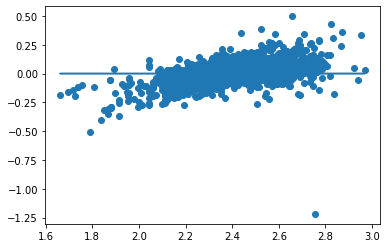

In [ ]:
residuals = (Y_test -y_Pred)
residuals
# sns.scatterplot(x=Y_test,y=residual,hue=Final_data['price_Transformed'])

plt.scatter(Y_test, residuals)
plt.plot(Y_test, [0]*len(Y_test))

In [ ]:
errors = mean_squared_error(Y_test, y_Pred)
errors


0.008242457507118607

In [ ]:
X.total_sqft_norm

0        1056.0
1        2600.0
3        1521.0
5        1170.0
11       2785.0
          ...  
13308    1527.0
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
Name: total_sqft_norm, Length: 7129, dtype: float64

In [ ]:
def predict_price(location, sqft,bath, bhk,balcony):
  loc_index=np.where(X.columns==location)[0][0]
  x = np.zeros(len(X.columns))
  # print(X.columns)
  x[0] = bath
  x[1] = balcony
  x[2] = bhk
  x[3] = sqft
  if loc_index >= 0 :
    x[loc_index] = 1
  # print(len(x))
  return linerReg.predict([x])[0]
  
location = '1st Phase JP Nagar'
sqft =3453;
pred=predict_price(location,sqft,2,3,1);
print(pred)
print(X.columns)


2.5649677982739902
Index(['bath', 'balcony', 'BHK', 'total_sqft_norm', '1st Phase JP Nagar',
       '5th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar',
       '9th Phase JP Nagar', 'AECS Layout',
       ...
       'Uttarahalli', 'Varthur', 'Vidyaranyapura', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur', 'other'],
      dtype='object', length=155)


In [ ]:
result = inv_boxcox(pred, priceLambda)
print("price per sqft in area {0} is {1}".format(location,result*100000/sqft))

price per sqft in area 1st Phase JP Nagar is 4518.1707301818105


In [ ]:
import pickle 
pickle.dump(linerReg,open('HouseDataPrediction.pkl','wb'));